In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics
import gzip

In [63]:
with gzip.open('t10k-images-idx3-ubyte.gz', 'rb') as f:
    testset_im = f.read()
    
with gzip.open('t10k-labels-idx1-ubyte.gz', 'rb') as f:
    testset_lb = f.read()
    
with gzip.open('train-images-idx3-ubyte.gz', 'rb') as f:
    trainingset_im = f.read()
    
with gzip.open('train-labels-idx1-ubyte.gz', 'rb') as f:
    trainingset_lb = f.read()

In [4]:
# aux1 = list(trainingset_im)
# del aux1[:16]

# train_im = []
# for i in range(60000):
#     im = aux1[:784]
#     train_im.append(np.array(im))
#     del aux1[:784]

# np.savetxt('train_im.csv', train_im, delimiter=',')

In [65]:
# aux2 = list(testset_im)
# del aux2[:16]

# test_im = []
# for i in range(10000):
#     im = aux2[:784]
#     test_im.append(np.array(im))
#     del aux2[:784]

# np.savetxt('test_im.csv', test_im, delimiter=',')

In [6]:
# aux3 = list(trainingset_lb)
# del aux3[:8]

# train_lb = []
# for i in range(60000):
#     im = aux3[i]
#     train_lb.append(np.array(im))

# np.savetxt('train_lb.csv', train_lb, delimiter=',')

In [7]:
# aux4 = list(testset_lb)
# del aux4[:8]

# test_lb = []
# for i in range(10000):
#     im = aux4[i]
#     test_lb.append(np.array(im))

# np.savetxt('test_lb.csv', test_lb, delimiter=',')

In [9]:
train_im = np.loadtxt('train_im.csv', delimiter=',')

In [10]:
train_lb = np.loadtxt('train_lb.csv', delimiter=',')

In [11]:
test_im = np.loadtxt('test_im.csv', delimiter=',')

In [12]:
test_lb = np.loadtxt('test_lb.csv', delimiter=',')

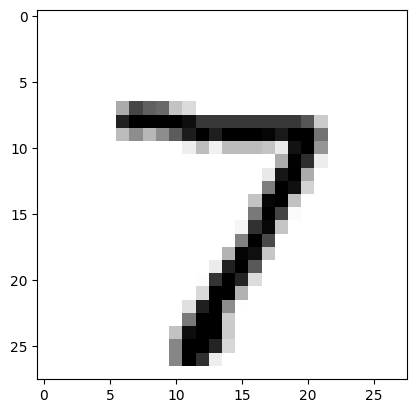

In [13]:
plt.imshow(test_im[0].reshape((28, 28)), cmap='gray_r')

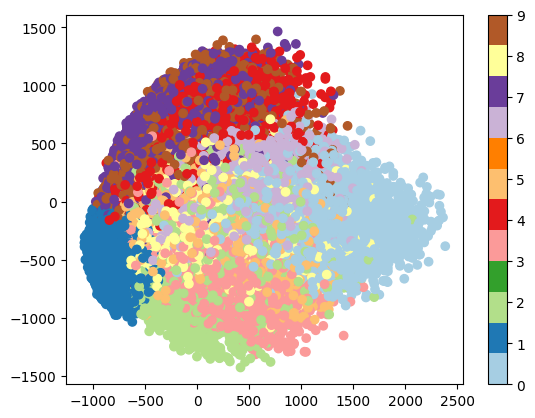

In [73]:
pca = PCA(n_components=2)
proj = pca.fit_transform(np.concatenate((train_im, test_im)))
plt.scatter(proj[:, 0], proj[:, 1], c=np.concatenate((train_lb, test_lb)), cmap="Paired")
plt.colorbar()

In [74]:
clf = GaussianNB()
clf.fit(train_im, train_lb)

predicted = clf.predict(test_im)
expected = test_lb

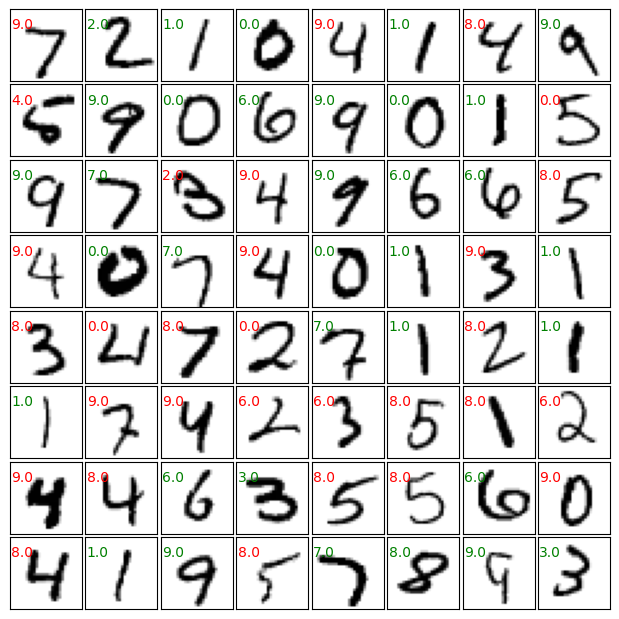

In [77]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)


for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(test_im.reshape(-1, 28, 28)[i], cmap='gray_r')

    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

In [78]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

         0.0       0.79      0.89      0.84       980
         1.0       0.85      0.95      0.90      1135
         2.0       0.90      0.26      0.40      1032
         3.0       0.71      0.35      0.47      1010
         4.0       0.88      0.17      0.29       982
         5.0       0.55      0.05      0.09       892
         6.0       0.65      0.93      0.77       958
         7.0       0.88      0.27      0.42      1028
         8.0       0.28      0.67      0.40       974
         9.0       0.37      0.95      0.53      1009

    accuracy                           0.56     10000
   macro avg       0.69      0.55      0.51     10000
weighted avg       0.69      0.56      0.52     10000



In [79]:
print(metrics.confusion_matrix(expected, predicted))

plt.show()

[[ 870    0    3    5    2    5   31    1   35   28]
 [   0 1079    2    1    0    0   10    0   38    5]
 [  79   25  266   91    5    2  269    4  271   20]
 [  32   39    6  353    2    3   51    8  409  107]
 [  19    2    5    4  168    7   63    7  210  497]
 [  71   25    1   20    3   44   40    2  586  100]
 [  12   12    3    1    1    7  895    0   26    1]
 [   0   15    2   10    5    1    5  280   39  671]
 [  13   72    3    7    3   11   12    4  648  201]
 [   5    7    3    6    1    0    1   13   18  955]]


In [82]:
clf_KN = KNeighborsClassifier(n_neighbors=10)
clf_KN.fit(train_im, train_lb)

predictedKN = clf_KN.predict(test_im)
expectedKN = test_lb

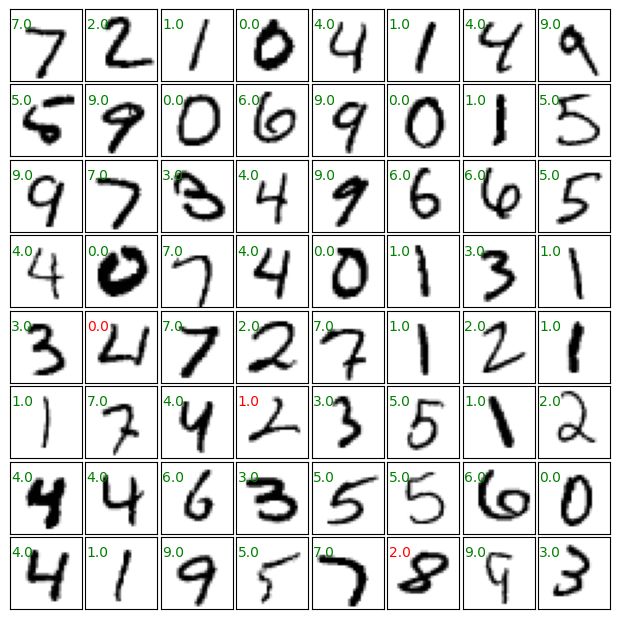

In [83]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)


for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(test_im.reshape(-1, 28, 28)[i], cmap='gray_r')

    # label the image with the target value
    if predictedKN[i] == expectedKN[i]:
        ax.text(0, 7, str(predictedKN[i]), color='green')
    else:
        ax.text(0, 7, str(predictedKN[i]), color='red')

In [85]:
print(metrics.classification_report(expectedKN, predictedKN))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       980
         1.0       0.94      1.00      0.97      1135
         2.0       0.98      0.95      0.97      1032
         3.0       0.97      0.97      0.97      1010
         4.0       0.97      0.96      0.97       982
         5.0       0.97      0.97      0.97       892
         6.0       0.98      0.98      0.98       958
         7.0       0.96      0.96      0.96      1028
         8.0       0.99      0.94      0.96       974
         9.0       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [87]:
print(metrics.confusion_matrix(expectedKN, predictedKN))

plt.show()

[[ 972    1    1    0    0    2    3    1    0    0]
 [   0 1132    2    0    0    0    1    0    0    0]
 [  13   12  982    2    1    0    2   17    3    0]
 [   0    3    3  976    1   10    1    7    6    3]
 [   2   11    0    0  940    0    4    1    1   23]
 [   4    0    0   12    1  863    6    1    1    4]
 [   6    4    0    0    3    2  943    0    0    0]
 [   0   27    4    0    2    0    0  983    0   12]
 [   6    4    5   11    7    9    4    7  914    7]
 [   7    6    3    7   10    3    1   10    2  960]]


In [14]:
clf_NN = MLPClassifier(random_state=1, max_iter=300)
clf_NN.fit(train_im, train_lb)

predictedNN = clf_NN.predict(test_im)
expectedNN = test_lb

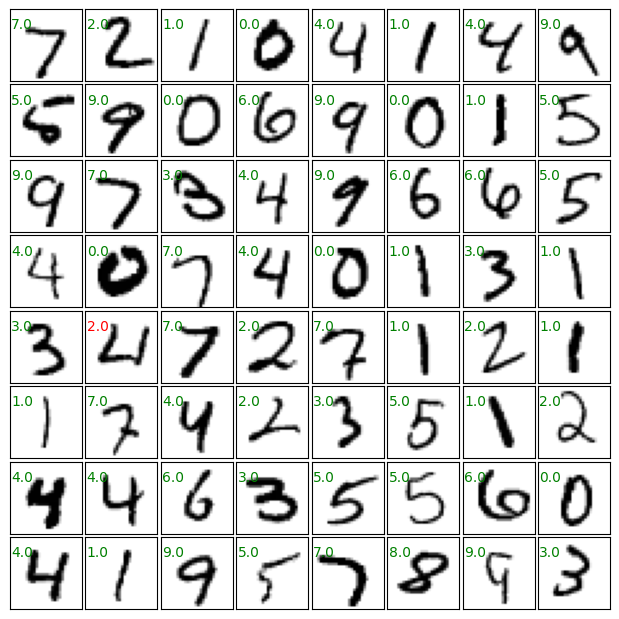

In [15]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)


for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(test_im.reshape(-1, 28, 28)[i], cmap='gray_r')

    # label the image with the target value
    if predictedNN[i] == expectedNN[i]:
        ax.text(0, 7, str(predictedNN[i]), color='green')
    else:
        ax.text(0, 7, str(predictedNN[i]), color='red')

In [16]:
print(metrics.classification_report(expectedNN, predictedNN))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       980
         1.0       0.99      0.99      0.99      1135
         2.0       0.96      0.97      0.97      1032
         3.0       0.95      0.97      0.96      1010
         4.0       0.97      0.96      0.96       982
         5.0       0.96      0.96      0.96       892
         6.0       0.98      0.97      0.98       958
         7.0       0.97      0.96      0.96      1028
         8.0       0.94      0.96      0.95       974
         9.0       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [17]:
print(metrics.confusion_matrix(expectedNN, predictedNN))

plt.show()

[[ 964    1    1    0    2    0    2    2    4    4]
 [   4 1118    3    1    0    1    2    1    5    0]
 [   1    0 1003   12    3    0    2    6    4    1]
 [   1    0    8  983    0   10    0    2    2    4]
 [   2    1    6    1  939    2    8    1    4   18]
 [   2    0    1   15    1  854    1    1   16    1]
 [   5    3    0    1    7    4  933    1    4    0]
 [   0    4   15    7    3    2    0  982    8    7]
 [   8    1    7   13    3    5    3    2  931    1]
 [   5    3    1    5    8    7    0   11   14  955]]


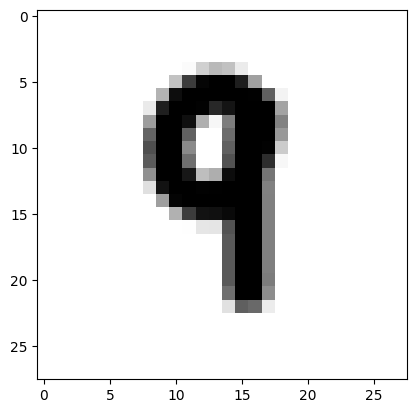

In [22]:
ex = Image.open('Jorge2.png')
ex = ImageOps.grayscale(ex)
#ex = ImageOps.autocontrast(ex, cutoff=(0.1, 95), ignore=1)
ex = ImageOps.invert(ex)
ex = ImageOps.fit(ex, (28, 28))
a = np.asarray(ex)
plt.imshow(a, cmap='gray_r')

In [251]:
a.reshape(1, 25600)

array([[0, 0, 0, ..., 3, 0, 0]], dtype=uint8)

In [23]:
predicted_ex = clf_NN.predict(a.reshape(1, 784))
predicted_ex

array([9.])